In [1]:
import os
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
mpl.rcParams['font.size']      = 18
mpl.rcParams['font.weight']    = 'bold'
mpl.rcParams['axes.grid']      = True
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['figure.figsize'] = np.array([15, 8])
mpl.rcParams['axes.xmargin']   = 0

## Load in Raw Dataframe

In [3]:
data_dir = 'data_out'
fname    = '20170701-WSPR_RBN-World.csv.bz2'
fpath    = os.path.join(data_dir,fname)

In [4]:
df    = pd.read_csv(fpath,comment='#',parse_dates=['datetime_ut'])

In [5]:
df

,datetime_ut,source,freq_kHz,snr,tx,rx,tx_lat,tx_long,rx_lat,rx_long,dist_Km,midpoint_lat,midpoint_long,midpoint_localTime
0,2017-07-01 00:00:00,WSPR,14097.1,-26.0,8P9HA,DF2JP,13.0625,-59.5417,51.3125,6.62500,7229,36.639548,-34.551329,21.696578
1,2017-07-01 00:00:00,WSPR,14097.1,-24.0,8P9HA,G4ZFQ,13.0625,-59.5417,50.7292,-1.29167,6676,35.279135,-37.161617,21.522559
2,2017-07-01 00:00:00,WSPR,14097.1,-17.0,8P9HA,K2RHK,13.0625,-59.5417,41.0625,-72.37500,3354,27.206255,-65.137608,19.657493
3,2017-07-01 00:00:00,WSPR,14097.1,-20.0,8P9HA,K5XL,13.0625,-59.5417,32.6458,-97.12500,4389,23.992347,-76.915559,18.872296
4,2017-07-01 00:00:00,WSPR,14097.1,-20.0,8P9HA,K9AN,13.0625,-59.5417,40.1042,-88.12500,4101,27.299976,-72.077640,19.194824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007797,2017-07-01 23:59:58,RBN,14006.2,16.0,K2XX,N9YKE,36.9792,-80.3750,42.9792,-87.95830,928,40.040906,-83.999791,18.399458
1007798,2017-07-01 23:59:58,RBN,14027.4,8.0,K6SRZ,VE7AB,38.3125,-122.7080,48.6458,-123.45800,1151,43.479758,-123.050846,15.796055
1007799,2017-07-01 23:59:58,RBN,7017.5,6.0,UT1V,DO4DXA,48.8958,33.4583,48.1042,11.37500,1624,49.030636,22.329351,1.488068
1007800,2017-07-01 23:59:59,RBN,7037.6,18.0,K4RUM,KQ8M,40.7292,-73.9583,41.6458,-81.29170,622,41.245690,-77.599300,18.826436


## Use spots only from desired frequency range

In [6]:
# Select only spots in the 14 MHz ham radio band.
freq_range = (14000,14350)
tf  = np.logical_and(df['freq_kHz'] >= freq_range[0],df['freq_kHz'] < freq_range[1])
dft = df[tf].copy()

In [7]:
dft

,datetime_ut,source,freq_kHz,snr,tx,rx,tx_lat,tx_long,rx_lat,rx_long,dist_Km,midpoint_lat,midpoint_long,midpoint_localTime
0,2017-07-01 00:00:00,WSPR,14097.1,-26.0,8P9HA,DF2JP,13.0625,-59.5417,51.3125,6.62500,7229,36.639548,-34.551329,21.696578
1,2017-07-01 00:00:00,WSPR,14097.1,-24.0,8P9HA,G4ZFQ,13.0625,-59.5417,50.7292,-1.29167,6676,35.279135,-37.161617,21.522559
2,2017-07-01 00:00:00,WSPR,14097.1,-17.0,8P9HA,K2RHK,13.0625,-59.5417,41.0625,-72.37500,3354,27.206255,-65.137608,19.657493
3,2017-07-01 00:00:00,WSPR,14097.1,-20.0,8P9HA,K5XL,13.0625,-59.5417,32.6458,-97.12500,4389,23.992347,-76.915559,18.872296
4,2017-07-01 00:00:00,WSPR,14097.1,-20.0,8P9HA,K9AN,13.0625,-59.5417,40.1042,-88.12500,4101,27.299976,-72.077640,19.194824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007794,2017-07-01 23:59:57,RBN,14044.2,3.0,K2M,KL7RA,42.1042,-75.8750,60.7708,-151.20800,5271,57.421240,-104.499011,17.032566
1007795,2017-07-01 23:59:57,RBN,14006.2,26.0,K2XX,VE6JY,36.9792,-80.3750,53.7292,-112.79200,3100,46.488610,-94.102549,17.725663
1007796,2017-07-01 23:59:57,RBN,14043.7,14.0,VE7SGW,N6TV,49.1458,-122.5420,37.2292,-121.79200,1326,43.188106,-122.130262,15.857149
1007797,2017-07-01 23:59:58,RBN,14006.2,16.0,K2XX,N9YKE,36.9792,-80.3750,42.9792,-87.95830,928,40.040906,-83.999791,18.399458


## Add Julian Date Column

In [8]:
dft['julian_date'] = dft['datetime_ut'].apply(pd.Timestamp.to_julian_date)

In [9]:
dft

,datetime_ut,source,freq_kHz,snr,tx,rx,tx_lat,tx_long,rx_lat,rx_long,dist_Km,midpoint_lat,midpoint_long,midpoint_localTime,julian_date
0,2017-07-01 00:00:00,WSPR,14097.1,-26.0,8P9HA,DF2JP,13.0625,-59.5417,51.3125,6.62500,7229,36.639548,-34.551329,21.696578,2.457936e+06
1,2017-07-01 00:00:00,WSPR,14097.1,-24.0,8P9HA,G4ZFQ,13.0625,-59.5417,50.7292,-1.29167,6676,35.279135,-37.161617,21.522559,2.457936e+06
2,2017-07-01 00:00:00,WSPR,14097.1,-17.0,8P9HA,K2RHK,13.0625,-59.5417,41.0625,-72.37500,3354,27.206255,-65.137608,19.657493,2.457936e+06
3,2017-07-01 00:00:00,WSPR,14097.1,-20.0,8P9HA,K5XL,13.0625,-59.5417,32.6458,-97.12500,4389,23.992347,-76.915559,18.872296,2.457936e+06
4,2017-07-01 00:00:00,WSPR,14097.1,-20.0,8P9HA,K9AN,13.0625,-59.5417,40.1042,-88.12500,4101,27.299976,-72.077640,19.194824,2.457936e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007794,2017-07-01 23:59:57,RBN,14044.2,3.0,K2M,KL7RA,42.1042,-75.8750,60.7708,-151.20800,5271,57.421240,-104.499011,17.032566,2.457936e+06
1007795,2017-07-01 23:59:57,RBN,14006.2,26.0,K2XX,VE6JY,36.9792,-80.3750,53.7292,-112.79200,3100,46.488610,-94.102549,17.725663,2.457936e+06
1007796,2017-07-01 23:59:57,RBN,14043.7,14.0,VE7SGW,N6TV,49.1458,-122.5420,37.2292,-121.79200,1326,43.188106,-122.130262,15.857149,2.457936e+06
1007797,2017-07-01 23:59:58,RBN,14006.2,16.0,K2XX,N9YKE,36.9792,-80.3750,42.9792,-87.95830,928,40.040906,-83.999791,18.399458,2.457936e+06


## Create bins for historgram

In [10]:
sDate = datetime.datetime(2017,7,1)
eDate = sDate + datetime.timedelta(days=1)
bins  = [sDate]

bin_size = datetime.timedelta(minutes=5)
while bins[-1] < eDate:
    bins.append(bins[-1]+bin_size)

In [11]:
bins

[datetime.datetime(2017, 7, 1, 0, 0),
 datetime.datetime(2017, 7, 1, 0, 5),
 datetime.datetime(2017, 7, 1, 0, 10),
 datetime.datetime(2017, 7, 1, 0, 15),
 datetime.datetime(2017, 7, 1, 0, 20),
 datetime.datetime(2017, 7, 1, 0, 25),
 datetime.datetime(2017, 7, 1, 0, 30),
 datetime.datetime(2017, 7, 1, 0, 35),
 datetime.datetime(2017, 7, 1, 0, 40),
 datetime.datetime(2017, 7, 1, 0, 45),
 datetime.datetime(2017, 7, 1, 0, 50),
 datetime.datetime(2017, 7, 1, 0, 55),
 datetime.datetime(2017, 7, 1, 1, 0),
 datetime.datetime(2017, 7, 1, 1, 5),
 datetime.datetime(2017, 7, 1, 1, 10),
 datetime.datetime(2017, 7, 1, 1, 15),
 datetime.datetime(2017, 7, 1, 1, 20),
 datetime.datetime(2017, 7, 1, 1, 25),
 datetime.datetime(2017, 7, 1, 1, 30),
 datetime.datetime(2017, 7, 1, 1, 35),
 datetime.datetime(2017, 7, 1, 1, 40),
 datetime.datetime(2017, 7, 1, 1, 45),
 datetime.datetime(2017, 7, 1, 1, 50),
 datetime.datetime(2017, 7, 1, 1, 55),
 datetime.datetime(2017, 7, 1, 2, 0),
 datetime.datetime(2017, 7, 1,

In [12]:
# Convert bins to Julian Dates
bins_jd = [x.to_julian_date() for x in pd.to_datetime(bins)]

In [13]:
bins_jd

[2457935.5,
 2457935.503472222,
 2457935.5069444445,
 2457935.5104166665,
 2457935.513888889,
 2457935.517361111,
 2457935.5208333335,
 2457935.5243055555,
 2457935.527777778,
 2457935.53125,
 2457935.534722222,
 2457935.5381944445,
 2457935.5416666665,
 2457935.545138889,
 2457935.548611111,
 2457935.5520833335,
 2457935.5555555555,
 2457935.559027778,
 2457935.5625,
 2457935.565972222,
 2457935.5694444445,
 2457935.5729166665,
 2457935.576388889,
 2457935.579861111,
 2457935.5833333335,
 2457935.5868055555,
 2457935.590277778,
 2457935.59375,
 2457935.597222222,
 2457935.6006944445,
 2457935.6041666665,
 2457935.607638889,
 2457935.611111111,
 2457935.6145833335,
 2457935.6180555555,
 2457935.621527778,
 2457935.625,
 2457935.628472222,
 2457935.6319444445,
 2457935.6354166665,
 2457935.638888889,
 2457935.642361111,
 2457935.6458333335,
 2457935.6493055555,
 2457935.652777778,
 2457935.65625,
 2457935.659722222,
 2457935.6631944445,
 2457935.6666666665,
 2457935.670138889,
 2457935.

## Compute and Plot Histogram

In [14]:
hist,bins_out = np.histogram(dft['julian_date'],bins_jd)

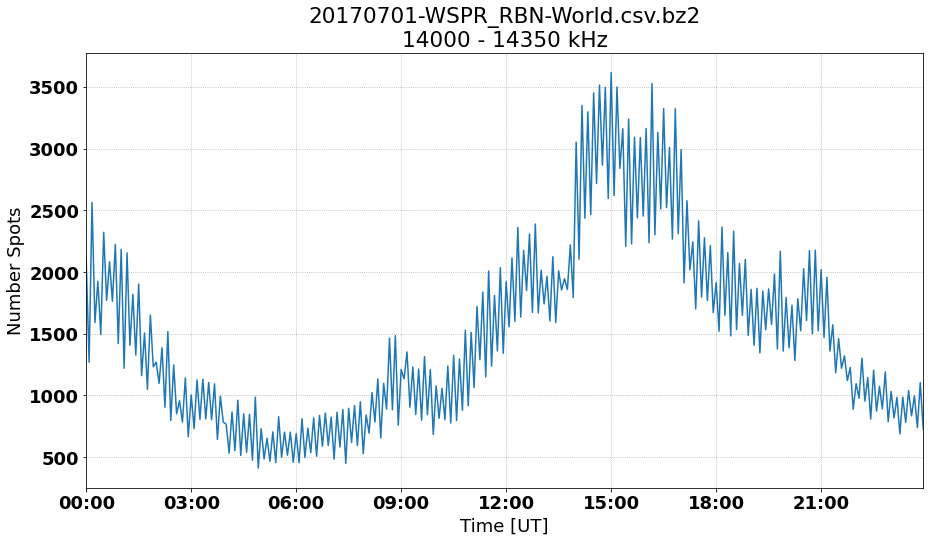

In [15]:
fig = plt.figure()
ax  = fig.add_subplot(1,1,1)

ax.plot(bins[:-1],hist)

title = []
title.append(fname)
title.append('{!s} - {!s} kHz'.format(freq_range[0],freq_range[1]))
ax.set_title('\n'.join(title))
ax.set_xlabel('Time [UT]')
ax.set_ylabel('Number Spots')

tcks = ax.get_xticks()
lbls = []
for tck in tcks:
    tck_date = mpl.dates.num2date(tck)
    lbl = tck_date.strftime('%H:%M')
    lbls.append(lbl)

ax.set_xticks(tcks)    
ax.set_xticklabels(lbls)

plt.show()